In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('ratings_Electronics (1).csv',header=None)
df.columns =['UserID', 'ProductID', 'Rating', 'Timestamp']

In [3]:
df.head()

,UserID,ProductID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserID     object 
 1   ProductID  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [5]:
df.isnull().sum()

UserID       0
ProductID    0
Rating       0
Timestamp    0
dtype: int64

In [6]:
df.describe()

,Rating,Timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [7]:
df.shape

(7824482, 4)

In [8]:
data =df.iloc[:1048576,0:]

### Ratings

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


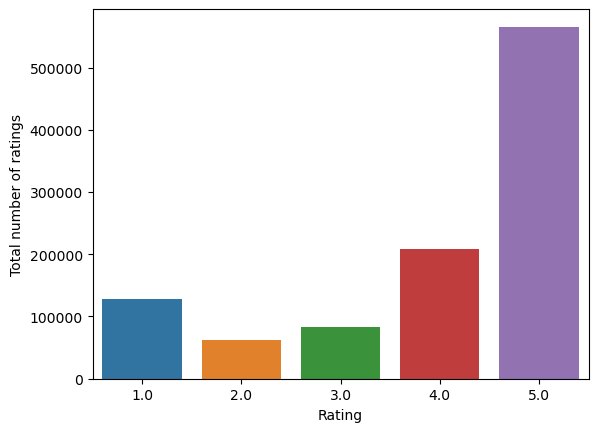

In [9]:
sns.countplot('Rating',data=data)
plt.xlabel('Rating')
plt.ylabel('Total number of ratings')
plt.show()

### Unique users and products

In [10]:
print('Total no. of ratings:',data.shape[0])
print('Total no.of user :',len(np.unique(data.UserID)))
print('Total no.of products :',len(np.unique(data.ProductID)))

Total no. of ratings: 1048576
Total no.of user : 786330
Total no.of products : 61894


In [11]:
data = data.drop('Timestamp',axis=1)

In [12]:
##Analysis of rating given by user
no_of_rated_product_per_user = data.groupby('UserID')['Rating'].count().sort_values(ascending =False)
no_of_rated_product_per_user.head()

UserID
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
Name: Rating, dtype: int64

In [13]:
print('No. of rated product more than 50 per user :{}\n'.format(sum(no_of_rated_product_per_user>=50)))

No. of rated product more than 50 per user :38



### Popularity Based Recommendation

In [14]:
#Getting the new dataframe which contains users who has given 50 or more ratings
new_df = data.groupby("ProductID").filter(lambda x:x['Rating'].count() >=50)
new_df.head()

,UserID,ProductID,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0


In [15]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,677947.0,4.049815,1.354329,1.0,4.0,5.0,5.0,5.0


In [16]:
ratings_mean_count = pd.DataFrame(new_df.groupby('ProductID')['Rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('ProductID')['Rating'].count())
ratings_mean_count.head()

,Rating,rating_counts
ProductID,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


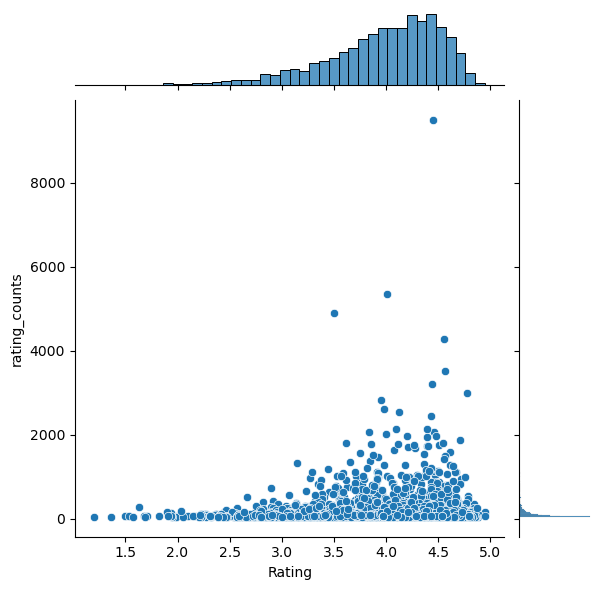

In [17]:
sns.jointplot(x='Rating',y='rating_counts',data=ratings_mean_count)

<AxesSubplot:>

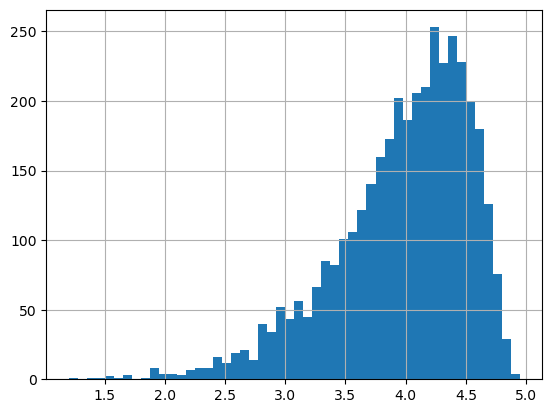

In [18]:
ratings_mean_count['Rating'].hist(bins=50)

In [19]:
popular_products = pd.DataFrame(new_df.groupby('ProductID')['Rating'].count())
most_popular = popular_products.sort_values('Rating',ascending = False)
most_popular.head(30)

,Rating
ProductID,
B0002L5R78,9487
B0001FTVEK,5345
B000I68BD4,4903
B000BQ7GW8,4275
B00007E7JU,3523
B000BKJZ9Q,3219
B000B9RI14,2996
B000A6PPOK,2828
B00007M1TZ,2608


### Collaberative filtering (Item-Item recommedation)

####  Model-based collaborative filtering system

In [29]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='UserID', columns='ProductID', fill_value=0)
ratings_matrix.head()

ProductID,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
UserID,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
ratings_matrix.shape

(9832, 76)

In [31]:
X=ratings_matrix.T
X.head()

UserID,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
ProductID,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X.shape

(76, 9832)

In [33]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

In [34]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [35]:
correlation_matrix

array([[ 1.        , -0.11651485, -0.13252162, ..., -0.0269547 ,
        -0.01672724,  0.138923  ],
       [-0.11651485,  1.        ,  0.97813135, ...,  0.73474395,
         0.724202  ,  0.00394973],
       [-0.13252162,  0.97813135,  1.        , ...,  0.76021532,
         0.75236713,  0.09037965],
       ...,
       [-0.0269547 ,  0.73474395,  0.76021532, ...,  1.        ,
         0.99265393,  0.65038282],
       [-0.01672724,  0.724202  ,  0.75236713, ...,  0.99265393,
         1.        ,  0.62748326],
       [ 0.138923  ,  0.00394973,  0.09037965, ...,  0.65038282,
         0.62748326,  1.        ]])

In [50]:
ProdId = "B00000JDF5"

In [59]:
#def recommend(ProdId):
product_names = list(X.index)
product_id = product_names.index(ProdId)
correlation_product_ID = correlation_matrix[product_id]
Recommend = list(X.index[correlation_product_ID>0.65])
Recommend.remove(ProdId) 
Recommend[0:10]

['B00000J1QR', 'B00000JSGF']

#### Memory based collaborative filtering system

In [27]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [49]:
query_index =np.random.choice(X.shape[0])
print("Choosen item is: ",X.index[query_index])

Choosen item is:  B00000JDF5


In [52]:
user_item_table_matrix = csr_matrix(X.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_item_table_matrix)
distances, indices = model_knn.kneighbors(X.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 10)

In [53]:
item = []
distance = []

for i in range(0, len(distances.flatten())):
    if i != 0:
        item.append(X.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])    

m=pd.Series(item,name='item')
d=pd.Series(distance,name='distance')
recommend = pd.concat([m,d], axis=1)
recommend = recommend.sort_values('distance',ascending=False)

print('Recommendations for {0}:\n'.format(X.index[query_index]))
for i in range(0,recommend.shape[0]):
    print('{0}: {1}, with distance of {2}'.format(i, recommend["item"].iloc[i], recommend["distance"].iloc[i]))

Recommendations for B00000JDF5:

0: B00000J3UJ, with distance of 1.0
1: B00000J4EY, with distance of 1.0
2: B00000J4GE, with distance of 1.0
3: B00000J4FS, with distance of 1.0
4: 1400698987, with distance of 0.9950663979552086
5: B00000J1QR, with distance of 0.9928982072855114
6: B00000JSGF, with distance of 0.9909002769240757
7: B00000JDF6, with distance of 0.9867547349872339
8: B00000J1V5, with distance of 0.9272197679219043
